# Heart Attack Analysis & Prediction Dataset

### About the dataset

the Heart Attack Analysis & Prediction Dataset from kaggle https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset

    -Age of the patient (age in years)
    -Sex of the patient (sex; 1 = male, 0 = female)
    -Exercise induced angina (exng; 1 = yes, 0 = no)
    -Number of major vessels (ca; 0-3)
    -Chest pain type (cp; Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)
    -Resting blood pressure (trestpbs; in mm/Hg on admission to the hospital)
    -Cholesterol levels (chol; in mg/dl)
    -Fasting blood sugar (fbs; if > 120 mg/dl, 1 = true; 0 = false)
    -Resting electrocardiographic results (rest_ecg; 0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes’ criteria)
    -Maximum heart rate achieved (thalach)
    -Chance of heart attack (target: Heart disease)
    -A blood disorder called thalassemia (thall; 1 = normal; 2 = fixed defect; 3 = reversable defect)
    -Previous peak (oldpeak; ST depression induced by exercise relative to rest - ‘ST’ relates to positions on the ECG plot)
    -Slope (slp; the slope of the peak exercise ST segment, Value 1: upsloping, Value 2: flat, Value 3: downsloping)

### Main objective

The main objective of this excercise is to build and evalaute various Classification models to
predict whether a particular person will have heart attack or not based on their features

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

C:\Users\ebraa\AppData\Roaming\Python\Python37\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
heart = pd.read_csv('heart.csv')

In [3]:
heart.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
heart.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Feature Engineering

In [6]:
duplicates=heart[heart.duplicated()]

duplicates

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [7]:
heart_1 = heart.drop_duplicates()

In [8]:
heart_1['output'].value_counts(normalize=True)

1    0.543046
0    0.456954
Name: output, dtype: float64

In [9]:
np.sum(heart_1.isna()==True)

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [10]:
heart_1

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


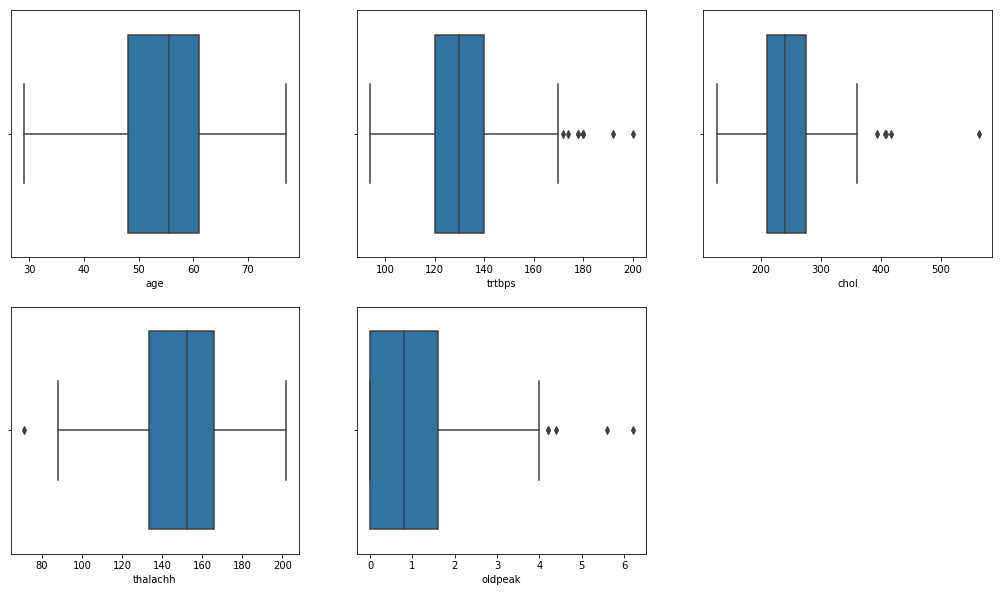

In [11]:
plt.figure(figsize=(30,10))
plt.subplot(2,5,1)
sns.boxplot(heart_1['age'])
plt.subplot(2,5,2)
sns.boxplot(heart_1['trtbps'])
plt.subplot(2,5,3)
sns.boxplot(heart_1['chol'])
plt.subplot(2,5,6)
sns.boxplot(heart_1['thalachh'])
plt.subplot(2,5,7)
sns.boxplot(heart_1['oldpeak']);


### Removing the outliers

In [12]:
for col in ['trtbps', 'chol', 'oldpeak']:
    Q1 = heart_1[col].quantile(0.25)
    Q3 = heart_1[col].quantile(0.75)
    IQR = Q3 - Q1
    heart_1.loc[heart_1[col] > Q3 + 1.5 * IQR, col] = heart_1.describe().loc['50%'][col]
    
Q1 = heart_1['thalachh'].quantile(0.25)
Q3 = heart_1['thalachh'].quantile(0.75)
IQR = Q3 - Q1
min_thalachh = Q1 - 1.5 * IQR
median_thalachh = heart_1.describe().loc['50%']['thalachh']
heart_1.loc[heart_1['thalachh'] < min_thalachh, 'thalachh'] = median_thalachh

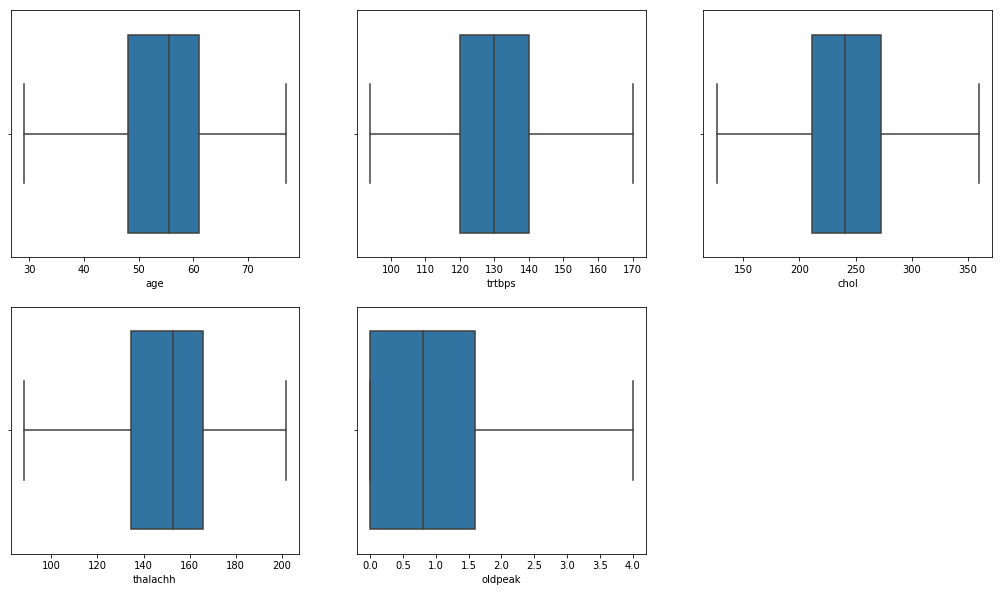

In [13]:
plt.figure(figsize=(30,10))
plt.subplot(2,5,1)
sns.boxplot(heart_1['age'])
plt.subplot(2,5,2)
sns.boxplot(heart_1['trtbps'])
plt.subplot(2,5,3)
sns.boxplot(heart_1['chol'])
plt.subplot(2,5,6)
sns.boxplot(heart_1['thalachh'])
plt.subplot(2,5,7)
sns.boxplot(heart_1['oldpeak']);

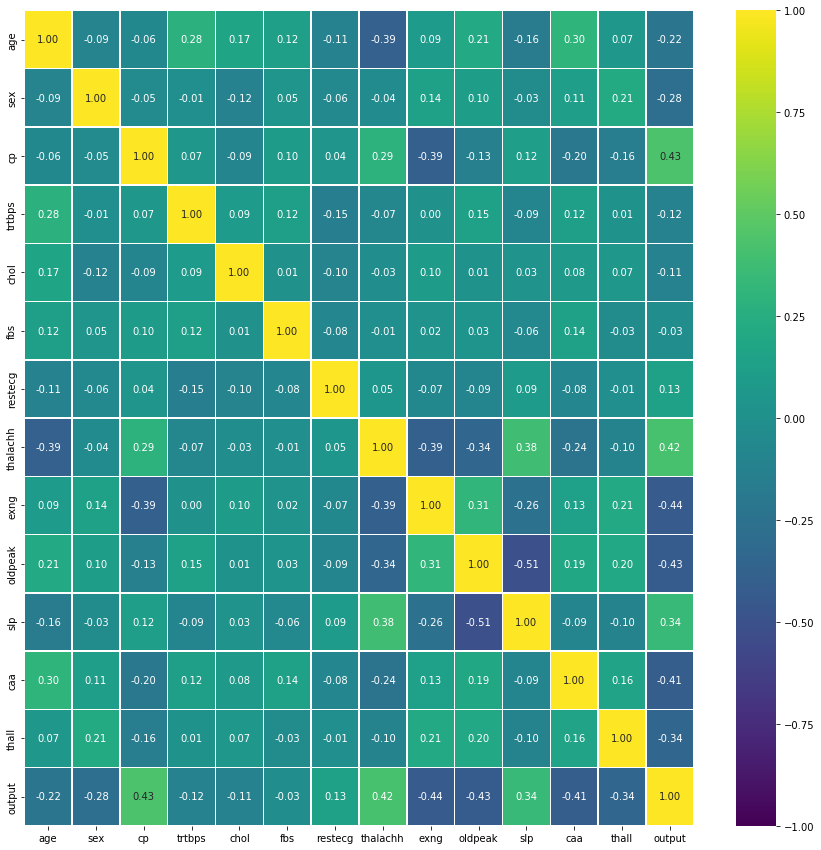

In [14]:
corrPearson = heart_1.corr(method="pearson")
figure = plt.figure(figsize=(15,15))
cm = sns.heatmap(corrPearson, annot=True, fmt=".2f", linewidth=.5, cmap='viridis', vmin=-1, vmax=+1)

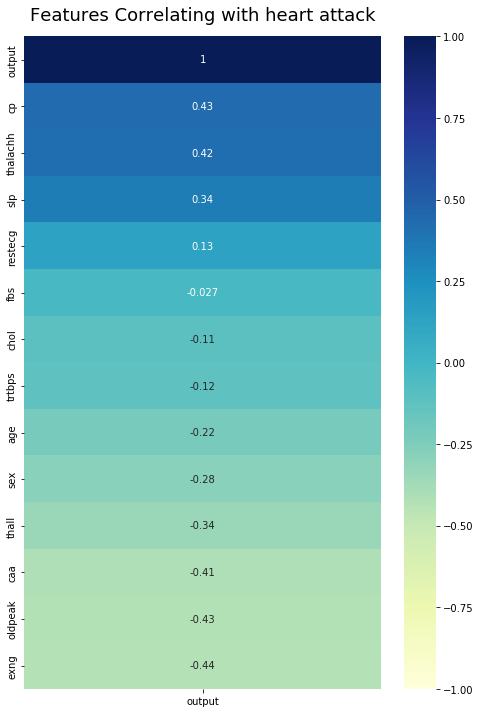

In [15]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(corrPearson[['output']].sort_values(by='output', ascending=False), vmin=-1, vmax=1, annot=True, cmap='YlGnBu')
heatmap.set_title('Features Correlating with heart attack', fontdict={'fontsize':18}, pad=16);

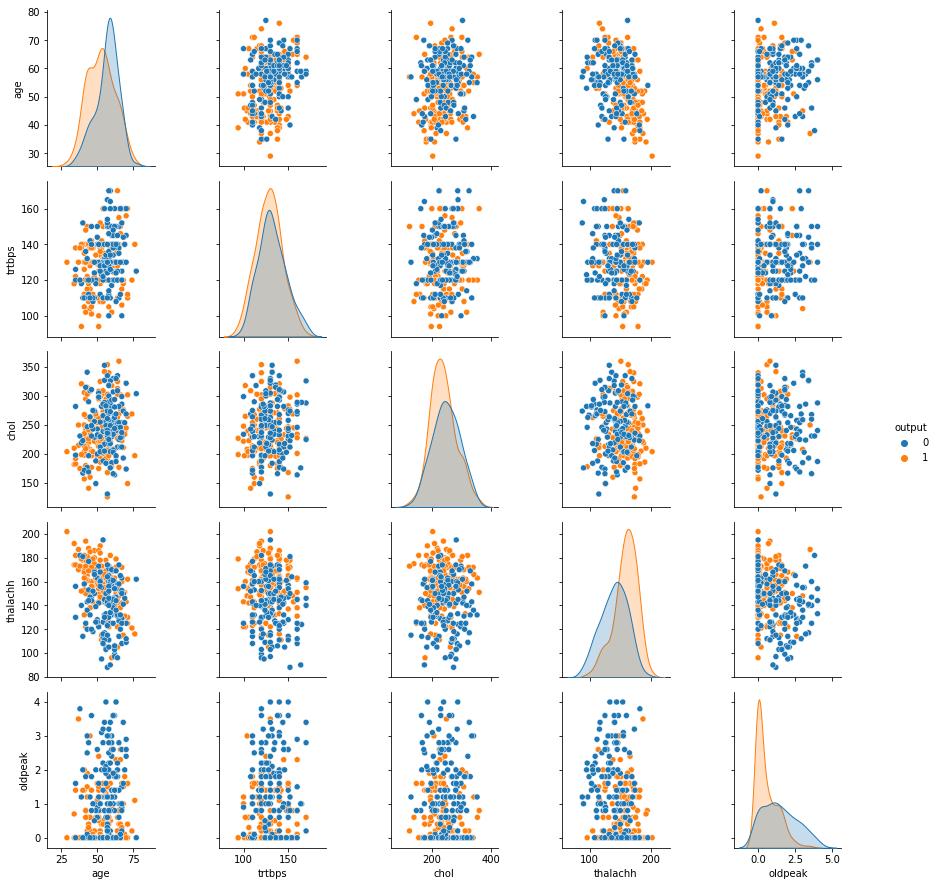

In [16]:
sns.pairplot(heart_1[['age','trtbps','chol','thalachh','oldpeak','output']],hue='output')

### Data Preprocessing

In [17]:
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_curve, precision_recall_curve, average_precision_score, auc,precision_recall_curve,confusion_matrix, f1_score


In [18]:
heart_2 = heart_1.copy()
cat_cols = ['sex','exng','caa','cp','fbs','restecg','slp','thall']
con_cols = ["age","trtbps","chol","thalachh","oldpeak"]

In [19]:
heart_2 = pd.get_dummies(heart_2, columns = cat_cols, drop_first = True)

In [20]:
X = heart_2.drop(['output'],axis=1)
y = heart_2[['output']]

scaler =  RobustScaler()
X[con_cols] = scaler.fit_transform(X[con_cols])
print("The first 5 rows of X are")
X.head()

The first 5 rows of X are


,age,trtbps,chol,thalachh,oldpeak,sex_1,exng_1,caa_1,caa_2,caa_3,...,cp_2,cp_3,fbs_1,restecg_1,restecg_2,slp_1,slp_2,thall_1,thall_2,thall_3
0,0.576923,0.75,-0.117886,-0.087302,0.9375,1,0,0,0,0,...,0,1,1,0,0,0,0,1,0,0
1,-1.423077,0.00,0.158537,1.087302,1.6875,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
2,-1.115385,0.00,-0.589431,0.611111,0.3750,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,0.038462,-0.50,-0.069106,0.801587,0.0000,1,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
4,0.115385,-0.50,1.849593,0.325397,-0.1250,0,1,0,0,0,...,0,0,0,1,0,0,1,0,1,0


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [22]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier


## Machine learning models

### Support Vector Machine

In [23]:
clf = SVC(kernel='linear', C=1, random_state=42).fit(X_train,y_train)

y_pred = clf.predict(X_test)
print("The test accuracy score of SVM is ", accuracy_score(y_test, y_pred))

The test accuracy score of SVM is  0.8524590163934426


In [24]:
svm = SVC()

parameters = {"C":np.arange(1,10,1),'gamma':[0.00001,0.00005, 0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5,1,5]}
searcher = GridSearchCV(svm, parameters)
searcher.fit(X_train, y_train)
print("The best params are :", searcher.best_params_)
print("The best score is   :", searcher.best_score_)
y_pred = searcher.predict(X_test)
svc_auc = accuracy_score(y_test, y_pred)
print("The test accuracy score of SVM after hyper-parameter tuning is ", svc_auc)

The best params are : {'C': 5, 'gamma': 0.05}
The best score is   : 0.8545068027210885
The test accuracy score of SVM after hyper-parameter tuning is  0.8688524590163934


### Logistic Regression

In [25]:
logreg = LogisticRegression()

logreg.fit(X_train, y_train)
y_pred_proba = logreg.predict_proba(X_test)
y_pred = np.argmax(y_pred_proba,axis=1)
lr_auc = accuracy_score(y_test, y_pred)
print("The test accuracy score of Logistric Regression is ", lr_auc)

The test accuracy score of Logistric Regression is  0.8688524590163934


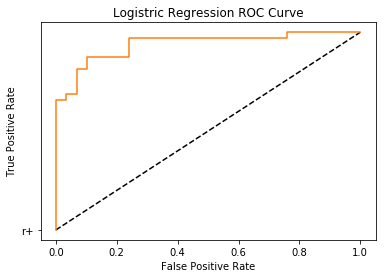

In [26]:
y_pred_prob = logreg.predict_proba(X_test)[:,1]

fpr,tpr,threshols=roc_curve(y_test,y_pred_prob)

plt.plot([0,1],[0,1],"k--",'r+')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistric Regression ROC Curve")
plt.show()

### Decision Tree

In [27]:
dt = DecisionTreeClassifier(random_state = 42)

dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
dt_auc = accuracy_score(y_test, y_pred)
print("The test accuracy score of Decision Tree is ", dt_auc)

The test accuracy score of Decision Tree is  0.7377049180327869


### Random Forest

In [28]:
rf = RandomForestClassifier()

rf.fit(X_train, y_train)
y_pred = dt.predict(X_test)
rf_auc = accuracy_score(y_test, y_pred)
print("The test accuracy score of Random Forest is ", rf_auc)

The test accuracy score of Random Forest is  0.7377049180327869


### Gradient Boosting Classifier

In [29]:
gbt = GradientBoostingClassifier(n_estimators = 300,max_depth=9,subsample=0.8,max_features=0.5,random_state=42)

gbt.fit(X_train,y_train)
y_pred = gbt.predict(X_test)
gbt_auc = accuracy_score(y_test, y_pred)
print("The test accuracy score of Gradient Boosting Classifier is ", gbt_auc)

The test accuracy score of Gradient Boosting Classifier is  0.8852459016393442


### K Nearest Neighbors

In [30]:
train_score = []
test_score = []
neighbors = range(1, 40)
for k in neighbors:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    train_score.append(accuracy_score(y_train, model.predict(X_train)))
    test_score.append(accuracy_score(y_test, model.predict(X_test)))

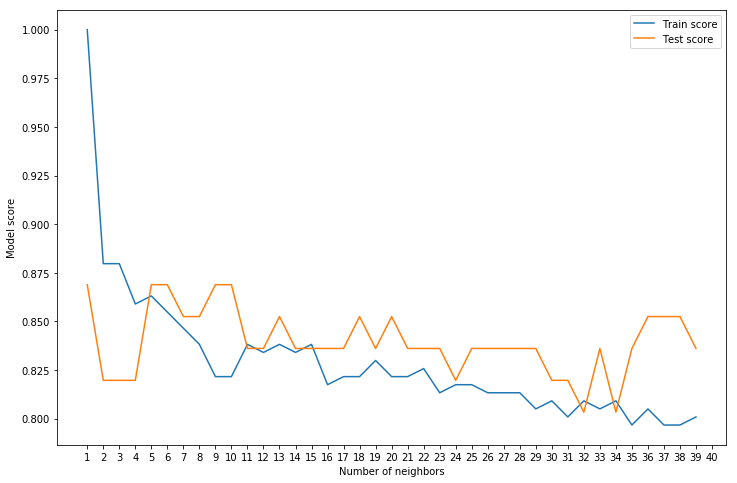

In [31]:
plt.figure(figsize=(12, 8))
plt.plot(neighbors, train_score, label="Train score")
plt.plot(neighbors, test_score, label="Test score")
plt.xticks(np.arange(1, 41, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

In [32]:
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train, y_train)

score_k=np.mean(cross_val_score(knn_clf, X_train, y_train, cv=5, scoring='accuracy'))
print("Accuracy is : ",score_k)

Accuracy is :  0.8131802721088436


In [33]:
def plotting(true,pred):
    fig,ax=plt.subplots(1,2,figsize=(10,5))
    precision,recall,threshold = precision_recall_curve(true,pred[:,1])
    ax[0].plot(recall,precision,'g--')
    ax[0].set_xlabel('Recall')
    ax[0].set_ylabel('Precision')
    ax[0].set_title("Average Precision Score : {}".format(average_precision_score(true,pred[:,1])))
    fpr,tpr,threshold = roc_curve(true,pred[:,1])
    ax[1].plot(fpr,tpr)
    ax[1].set_title("AUC Score is: {}".format(auc(fpr,tpr)))
    ax[1].plot([0,1],[0,1],'k--')
    ax[1].set_xlabel('False Positive Rate')
    ax[1].set_ylabel('True Positive Rate')

Text(0.5, 1.0, 'F1 Score = 0.875')

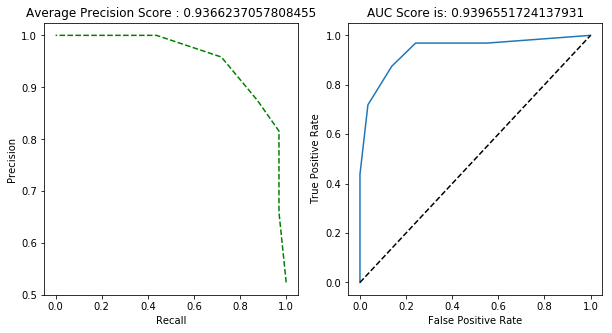

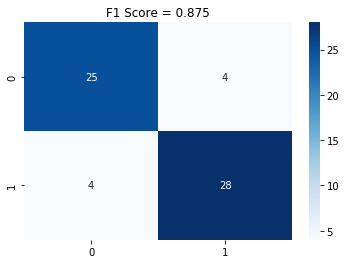

In [34]:
plotting(y_test,knn_clf.predict_proba(X_test))

fig=plt.figure()
sns.heatmap(confusion_matrix(y_test,knn_clf.predict(X_test)), annot= True, cmap='Blues')
knn_f1=f1_score(y_test,knn_clf.predict(X_test))
plt.title('F1 Score = {}'.format(knn_f1))

In [35]:
test_score = accuracy_score(y_test, knn_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, knn_clf.predict(X_train)) * 100

print('Test score : ', test_score)
print('Train score : ', train_score)

Test score :  86.88524590163934
Train score :  86.30705394190872


### Extra Trees Classifier

Accuracy is :  0.7798353909465021


Text(0.5, 1.0, 'F1 Score = 0.8888888888888888')

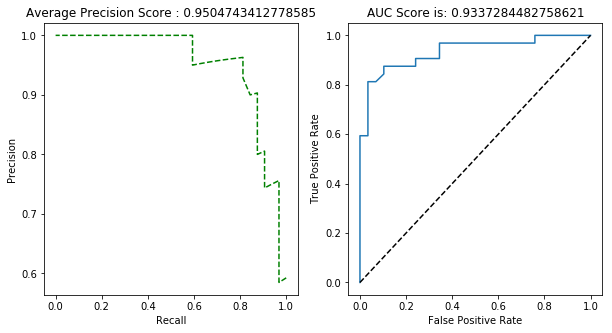

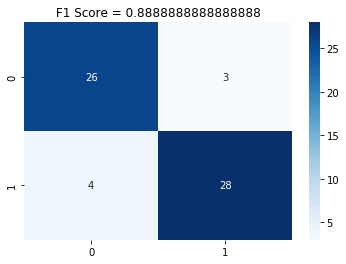

In [36]:
etc=ExtraTreesClassifier(n_estimators=200, n_jobs=-1, random_state=2)

etc.fit(X_train,y_train)
score_etc=np.mean(cross_val_score(etc, X_train, y_train, cv=3, scoring='accuracy'))
print("Accuracy is : ",score_etc)

plotting(y_test,etc.predict_proba(X_test))
fig=plt.figure()
sns.heatmap(confusion_matrix(y_test,etc.predict(X_test)), annot= True, cmap='Blues')

etc_f1=f1_score(y_test,etc.predict(X_test))
plt.title('F1 Score = {}'.format(etc_f1))

### Bagging Classifier

Accuracy is :  0.8213991769547325


Text(0.5, 1.0, 'F1 Score = 0.8064516129032259')

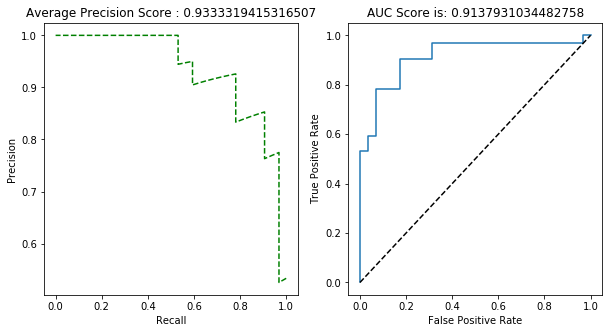

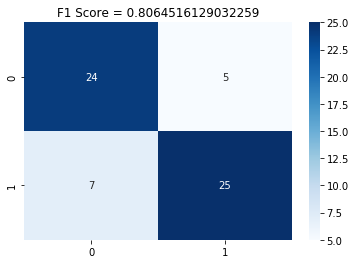

In [37]:
bc=BaggingClassifier(logreg,max_samples=23, bootstrap=True, n_jobs= -1)

bc.fit(X_train,y_train)
score_bc=np.mean(cross_val_score(bc, X_train, y_train, cv=3, scoring='accuracy'))
print("Accuracy is : ",score_bc)

plotting(y_test,bc.predict_proba(X_test))
fig=plt.figure()
sns.heatmap(confusion_matrix(y_test,bc.predict(X_test)), annot= True, cmap='Blues')

bc_f1=f1_score(y_test,bc.predict(X_test))
plt.title('F1 Score = {}'.format(bc_f1))

Text(0.5, 1.0, 'Feature Importance')

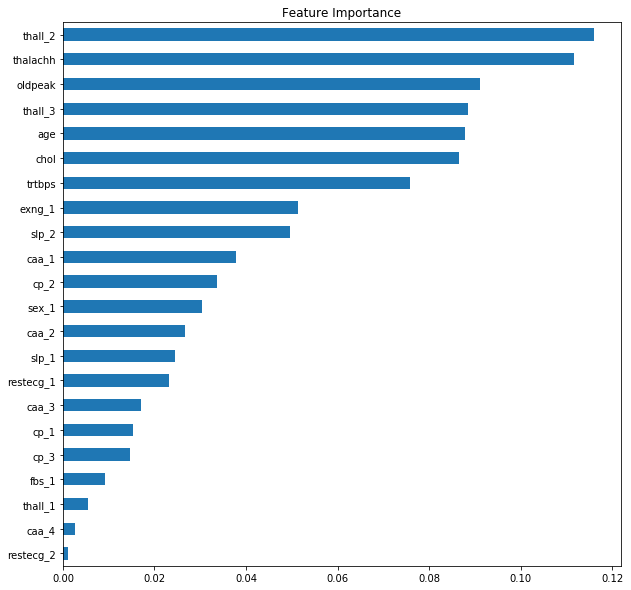

In [38]:
fig= plt.figure(figsize=(10,10))
important=pd.Series(rf.feature_importances_, index= X_train.columns)
important.sort_values().plot.barh()
plt.title('Feature Importance')

In [39]:
model_accuracy = pd.Series(data=[svc_auc, lr_auc, dt_auc, rf_auc, gbt_auc, score_k, score_etc, score_bc], 
                           index=['SVM', 'logistic Regression', 'decision tree', 'Random Forest', 'Gradient Boost', 'KNN', 
                            'Extra Tree', 'Bagging Classfier'])

Text(0.5, 1.0, 'Model Accuracy')

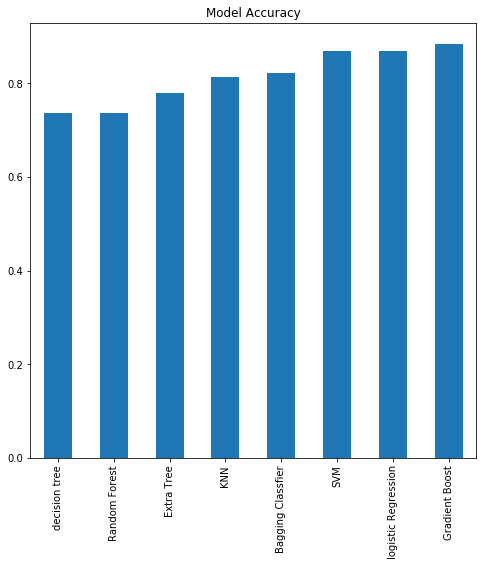

In [40]:
fig= plt.figure(figsize=(8,8))
model_accuracy.sort_values().plot.bar()
plt.title('Model Accuracy')

##### from the gragh we see that Gradient Boost has the best accurecy score

### Conclusion

In this report, the heart attack dataset from UCI was explored to find the most suitable ML algorithm for the prediction of a possible myocardial infarction

Overall, the dataset didn't require a lot of change and is of good quality. Nonetheless, it would be beneficial if there were more than 302 observations.

Based on the models' accuracy findings, the most suitable algorithm is the Gradient Boost classifier

### Next Steps

it will be nce to try creating voting classifier model by combining some of the models used in this notebook for better prediction